# Statistical Learning : TP 2 
J'écris des notes avec # dans mon TP. Parfois elles sont pour vous, parfois elles sont pour moi. Merci de les prendre en compte. 
## A - First linear regression using Python

In [139]:
import random 
import pandas as pd

In [140]:
df = pd.read_csv("tabBats.txt", sep=' ')
# Il faut mettre son fichier et son tp dans documents, ensuite on peut utiliser le nom du fichier pour l'ouvrir avec pandas.read_csv()
# sep=' ' c'est pour séparer les colonnes (sinon il pense qu'il n'y a qu'une seule colonne)

In [141]:
df

,id,Species,Diet,BOW,BRW,AUD,MOB,HIP
0,1,Rousettus aegyptiacus,1,136.30,2070.00,9.88,105.77,125.97
1,2,Epomops franqueti,1,120.00,2210.00,10.44,107.80,159.80
2,3,Eonycteris spelaea,1,58.70,1310.00,5.48,67.00,97.70
3,4,Cynopterus sphinx,1,48.30,1184.33,4.77,65.27,95.40
4,5,Dobsonia praedatrix,1,184.00,3028.00,7.09,213.43,233.30
5,6,Glossophaga soricina,1,10.60,414.00,3.74,12.20,35.00
6,7,Leptonycteris curasoae,1,24.50,610.00,5.57,18.60,44.95
7,8,Macroglossus miniumus,1,14.60,561.00,2.40,30.05,52.95
8,9,Syconycteris australis,1,14.70,570.00,2.13,31.40,53.10
9,10,Nyctimene albiventer,1,29.70,825.00,4.56,68.93,81.40


In [142]:
from numpy import *  
import matplotlib.pyplot as plt

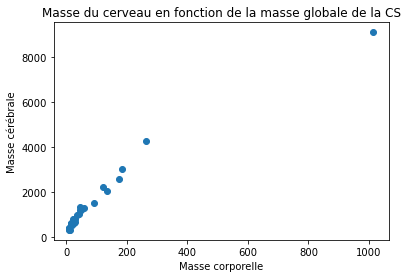

In [143]:
plt.scatter(df["BOW"], df["BRW"])
plt.title('Masse du cerveau en fonction de la masse globale de la CS')
plt.xlabel('Masse corporelle')
plt.ylabel('Masse cérébrale')
plt.show()

In [144]:
cov=df.cov()

In [145]:
V= cov["BOW"]["BOW"]
C=cov["BOW"]["BRW"]
betaun = C/V
print (betaun)

8.999877638992253


In [146]:
mu_X = df["BOW"].mean()
mu_Y = df["BRW"].mean()
print("moyenne de la masse cérébrale:", mu_Y)
print("moyenne de la masse corporelle:", mu_X)

moyenne de la masse cérébrale: 1410.2068965517242
moyenne de la masse corporelle: 87.41896551724139


In [147]:
betazero = mu_Y - betaun*mu_X

In [148]:
#On obtient l'équation de la droite affine : 
print("Y =", betaun, "*X +", betazero)

Y = 8.999877638992253 *X + 623.4469035692686


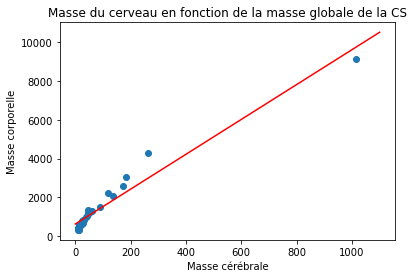

In [149]:
plt.scatter(df["BOW"], df["BRW"])
plt.plot([0, 1100], [betazero, betazero+(1100*betaun)], color = 'red', linestyle = 'solid')
plt.title('Masse du cerveau en fonction de la masse globale de la CS')
plt.xlabel('Masse cérébrale')
plt.ylabel('Masse corporelle')
plt.show()

In [150]:
import numpy as np
from sklearn.linear_model import LinearRegression as lr

In [151]:
y= np.array(df["BRW"]).reshape(-1,1)
x= np.array(df["BOW"]).reshape(-1,1)
model = lr().fit(x, y)
r_sq = model.score(x, y)
print(r_sq)

0.9500384360421301


In [152]:
b_0 = model.intercept_[0]
b_1 = model.coef_[0][0]
print('Y =', b_1, '*X +', b_0)

Y = 8.999877638992249 *X + 623.4469035692691


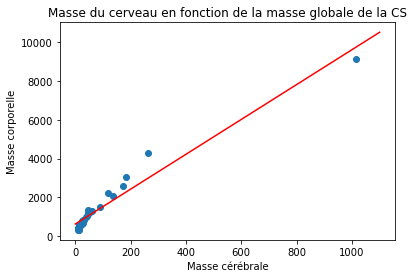

In [153]:
plt.scatter(df["BOW"], df["BRW"])
plt.plot([0, 1100], [b_0, b_0+(1100*b_1)], color = 'red', linestyle = 'solid')
plt.title('Masse du cerveau en fonction de la masse globale de la CS')
plt.xlabel('Masse cérébrale')
plt.ylabel('Masse corporelle')
plt.show()

In [154]:
df['BOW'].corr(df['BRW'])

0.974699151555048

In [155]:
L=[]
for i in range(0, 29): 
    res_i = df['BRW'][i] - (df['BOW'][i]*b_1) - b_0 
    print(res_i)

219.86977423608732
506.56777975166096
158.26027902188582
126.18900646740519
748.575610856157
-304.84560654258695
-233.94390572457922
-193.845117098556
-185.74510486245515
-65.74326944733889
172.0585414955758
-319.5456921952924
1308.5851550147618
-628.3228295074096
-181.4449457931451
299.6587372731882
82.66412115752928
-403.6454597093777
47.4576115519169
-187.80351784018472
406.5742648850719
-385.2658047674195
-237.64472554333116
-347.5458145563001
-187.24443187691259
23.55811323204864
-157.24492132094355
-35.84413821049395
-44.34370994696678


In [156]:
L=[df['BRW'][i] - (df['BOW'][i]*b_1) - b_0 for i in range(0, 29)] 
print(L)

[219.86977423608732, 506.56777975166096, 158.26027902188582, 126.18900646740519, 748.575610856157, -304.84560654258695, -233.94390572457922, -193.845117098556, -185.74510486245515, -65.74326944733889, 172.0585414955758, -319.5456921952924, 1308.5851550147618, -628.3228295074096, -181.4449457931451, 299.6587372731882, 82.66412115752928, -403.6454597093777, 47.4576115519169, -187.80351784018472, 406.5742648850719, -385.2658047674195, -237.64472554333116, -347.5458145563001, -187.24443187691259, 23.55811323204864, -157.24492132094355, -35.84413821049395, -44.34370994696678]


In [157]:
B = np.reshape([df["BOW"]],(29,))
print(B)

[ 136.3   120.     58.7    48.3   184.     10.6    24.5    14.6    14.7
   29.7    44.5     9.9   262.   1014.     16.     46.1    90.1    11.8
   36.9    27.67  173.      8.98   17.8     8.9    20.2    41.     16.2
   22.6    26.1 ]


In [158]:
B=B.reshape(-1,1)
Xe=model.predict(B)

In [159]:
df["BOW"][1]-Xe

array([[-1730.13022576],
       [-1583.43222025],
       [-1031.73972098],
       [ -938.14099353],
       [-2159.42438914],
       [ -598.84560654],
       [ -723.94390572],
       [ -634.8451171 ],
       [ -635.74510486],
       [ -770.74326945],
       [ -903.9414585 ],
       [ -592.5456922 ],
       [-2861.41484499],
       [-9629.32282951],
       [ -647.44494579],
       [ -918.34126273],
       [-1314.33587884],
       [ -609.64545971],
       [ -835.54238845],
       [ -752.47351784],
       [-2060.42573511],
       [ -584.26580477],
       [ -663.64472554],
       [ -583.54581456],
       [ -685.24443188],
       [ -872.44188677],
       [ -649.24492132],
       [ -706.84413821],
       [ -738.34370995]])

In [160]:
y= np.array(df["BOW"][1]-Xe).reshape(-1,1)
x= np.array(df["BRW"]).reshape(-1,1)
model = lr().fit(x, y)
r_sq = model.score(x, y)
print(r_sq)
c_0 = model.intercept_[0]
c_1 = model.coef_[0][0]
print('Y =', c_1, '*X +', c_0)

0.9500384360421301
Y = -0.9500384360421295 *X + 49.543857944100864


#### A la demande du prof de TP, j'ai réalisé ce graphique : 

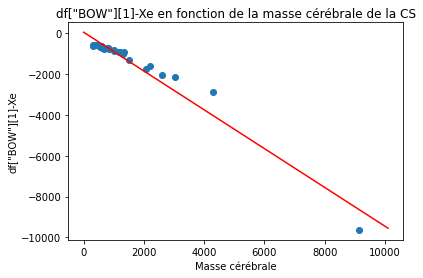

In [161]:
plt.scatter(df["BRW"], df["BOW"][1]-Xe) #Ici, je ne comprends pas l'équation df['BOW'][1]-Xe?... 
#Xe, c'est la prédiction des valeurs de df["BRW"] d'après une fonction qui part de l'ensemble df["BOW"][1] : 
#On peut ecrire (c'est grossier, mais c'est pour avoir l'idée) : Xe = -0.9500384360421295 *df["BOW"][1] + 49.543857944100864
#Donc df["BOW"][1]-Xe = 1.9500384360421295 *df["BOW"][1] - 49.543857944100864
#Je ne comprends pas ce que ça signifie ou ce que ça apporte... 
#En fait pour moi ça serait bon si c'était la masse corporelle qu'on essayait de prédire. Or c'est la masse cérébrale!...
plt.plot([0, 10100], [c_0, c_0+(10100*c_1)], color = 'red', linestyle = 'solid')
plt.title('df["BOW"][1]-Xe en fonction de la masse cérébrale de la CS')
plt.xlabel('Masse cérébrale')
plt.ylabel('df["BOW"][1]-Xe')
plt.show()

#### Ce graphique me semble plus adéquat... (même s'il est moins satisfaisant au niveau visuel)

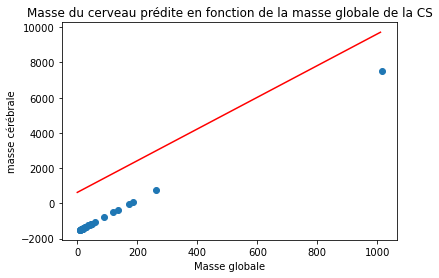

In [162]:
plt.scatter(df["BOW"], -(df["BRW"][1]-Xe)) 
plt.plot([0, 1010], [b_0, (b_0+(1010*b_1))], color = 'red', linestyle = 'solid')
plt.title('Masse du cerveau prédite en fonction de la masse globale de la CS')
plt.xlabel('Masse globale')
plt.ylabel('masse cérébrale')
plt.show()

#### Ou celui-ci, qui illustre avec des segments gris l'écart entre les masses cérébrales 1) prédite (intersection du segment avec la droite rouge) et 2) réelles (intersection du segment avec le point bleu) :

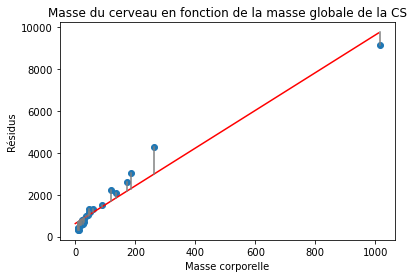

In [163]:
plt.scatter(df["BOW"], df['BRW'])
plt.plot([0, 1010], [b_0, (b_0+(1010*b_1))], color = 'red', linestyle = 'solid') #droite de prédiction
for i in range(0,29) :
    plt.plot([df['BOW'][i],df['BOW'][i]], [df['BRW'][i], (b_0+(df['BOW'][i]*b_1))], color = 'grey', linestyle = 'solid')
plt.title('Masse du cerveau en fonction de la masse globale de la CS')
plt.xlabel('Masse corporelle')
plt.ylabel('Résidus')
plt.show()

## B- Second linear regression

In [164]:
tab2 = df.drop(df.index[[13]]) 

In [165]:
tab2

,id,Species,Diet,BOW,BRW,AUD,MOB,HIP
0,1,Rousettus aegyptiacus,1,136.30,2070.00,9.88,105.77,125.97
1,2,Epomops franqueti,1,120.00,2210.00,10.44,107.80,159.80
2,3,Eonycteris spelaea,1,58.70,1310.00,5.48,67.00,97.70
3,4,Cynopterus sphinx,1,48.30,1184.33,4.77,65.27,95.40
4,5,Dobsonia praedatrix,1,184.00,3028.00,7.09,213.43,233.30
5,6,Glossophaga soricina,1,10.60,414.00,3.74,12.20,35.00
6,7,Leptonycteris curasoae,1,24.50,610.00,5.57,18.60,44.95
7,8,Macroglossus miniumus,1,14.60,561.00,2.40,30.05,52.95
8,9,Syconycteris australis,1,14.70,570.00,2.13,31.40,53.10
9,10,Nyctimene albiventer,1,29.70,825.00,4.56,68.93,81.40


In [166]:
y= np.array(tab2["BRW"]).reshape(-1,1)
x= np.array(tab2["BOW"]).reshape(-1,1)
model = lr().fit(x, y)
r_sq2 = model.score(x, y)
print(r_sq2)

0.9778253041251115


In [167]:
d_0 = model.intercept_[0]
d_1 = model.coef_[0][0]
print('Y =', d_1, '*X +', d_0)

Y = 14.509900826013135 *X + 346.5451556610758


In [168]:
tab2['BOW'].corr(tab2['BRW'])

0.9888504963466984

In [169]:
for i in range(0, 29):
    if i!=13 :
        res2_i = tab2['BRW'][i] - (tab2['BOW'][i]*d_1) - d_0 
        print(res2_i)
    else :
        pass #Premier calcul des résidus (plutôt "manuel")

-254.24463824666623
122.26674521734799
111.72366585195311
136.95663444248976
11.63309235250722
-86.35010441681504
-92.03772589839758
2.610292279132409
10.159302196531144
47.51078980633412
203.76425758133973
-97.19317383860584
141.86082792348293
7.2964311227140115
322.5484162597187
-136.8872200848591
-191.7619854080308
121.03950385903954
-63.36411151685934
-269.75799856134813
-157.84406507867376
-58.82139036410962
-119.68327301259271
-21.645152346541124
74.54891047238561
30.394450957511424
116.53108567102731
88.74643277998138


In [170]:
D = np.reshape([tab2["BOW"]],(28,))
print(D)

[136.3  120.    58.7   48.3  184.    10.6   24.5   14.6   14.7   29.7
  44.5    9.9  262.    16.    46.1   90.1   11.8   36.9   27.67 173.
   8.98  17.8    8.9   20.2   41.    16.2   22.6   26.1 ]


In [171]:
D=D.reshape(-1,1)
Xe2=model.predict(D)

In [172]:
tab2["BRW"][1]-Xe2 #Calcul des résidus

array([[ -114.24463825],
       [  122.26674522],
       [ 1011.72366585],
       [ 1162.62663444],
       [ -806.36690765],
       [ 1709.64989558],
       [ 1507.9622741 ],
       [ 1651.61029228],
       [ 1650.1593022 ],
       [ 1432.51078981],
       [ 1217.76425758],
       [ 1719.80682616],
       [-1938.13917208],
       [ 1631.29643112],
       [ 1194.54841626],
       [  556.11277992],
       [ 1692.23801459],
       [ 1328.03950386],
       [ 1461.96588848],
       [ -646.75799856],
       [ 1733.15593492],
       [ 1605.17860964],
       [ 1734.31672699],
       [ 1570.35484765],
       [ 1268.54891047],
       [ 1628.39445096],
       [ 1535.53108567],
       [ 1484.74643278]])

In [173]:
y= np.array(tab2["BRW"][1]-Xe2).reshape(-1,1)
x= np.array(tab2["BOW"]).reshape(-1,1)
model = lr().fit(x, y)
r_sq2 = model.score(x, y)
print(r_sq2)
d2_0 = model.intercept_[0]
d2_1 = model.coef_[0][0]
print('Y =', d2_1, '* X +', d2_0)

1.0
Y = -14.509900826013135 * X + 1863.4548443389242


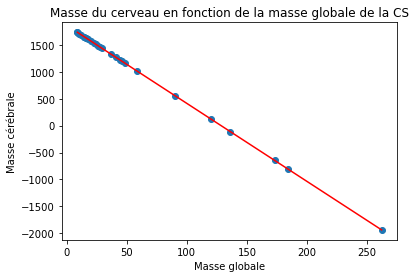

In [174]:
plt.scatter(tab2["BOW"], tab2["BRW"][1]-Xe2)
#On répète le modèle donné par le professeur de TP dans le A, mais en inversant BOW et BRW
plt.plot([tab2['BOW'][21], tab2['BOW'][12]], [d2_0 + (tab2['BOW'][21]*d2_1), d2_0 + (tab2['BOW'][12]*d2_1)], color = 'red', linestyle = 'solid')
plt.title('Masse du cerveau en fonction de la masse globale de la CS')
plt.xlabel('Masse globale')
plt.ylabel('Masse cérébrale')
plt.show()

#Ici, l'intérêt devrait être de comparer l'écart entre les points bleus et la droite rouge. 
#Mais là ça n'a pas vraiment d'intérêt car ils sont tous sur la droite. Il y a une erreur quelque part... 

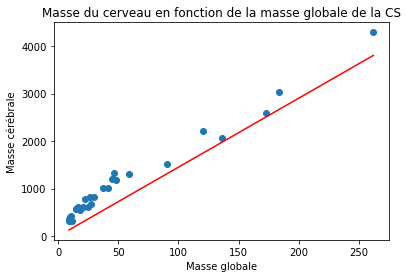

In [175]:
plt.scatter(tab2["BOW"], tab2["BRW"])
plt.plot([tab2['BOW'][21], tab2['BOW'][12]], [- (tab2['BOW'][21]*d2_1), - (tab2['BOW'][12]*d2_1)], color = 'red', linestyle = 'solid')
#Ci-dessus, le plt.plot va tracer la droite de la fonction qui nous prédit des valeurs pour la masse cérébrale en
#fonction de la masse globale. J'ai été obligée d'enlever d2_0 à l'équation de la droite et de la passer au
#négatif pour que ça corresponde à peu près... Je ne comprends pas pourquoi ona obtenu un coefficient d2_1 négatif...
plt.title('Masse du cerveau en fonction de la masse globale de la CS')
plt.xlabel('Masse globale')
plt.ylabel('Masse cérébrale')
plt.show()

#Ici, l'intérêt est peut-être de comparer l'écart entre les points bleus et la droite rouge. 
#Je ne comprends pas pourquoi ils sont tous au-dessus de la droite alors qu'on a des résidus négatifs...

In [176]:
#Désolée, mais je ne vois pas tellement l'intérêt de faire la partie trois : Je vois bien que je me trompe en 
#faisant les RL de cette manière, donc ça ne me semble pas très intelligent de la faire en répétant 
#une troisième fois les mêmes erreurs...
#Je préfère vous laisser ce que j'ai fait et essayer de comprendre comment faire les RL avant de me lancer. 
#Je suis vraiment désolée. 

## Fin du TP